### Lesson 82 Sine Wave data

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0,50,501)

In [3]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [4]:
# linespace(min, max, No of items)

In [5]:
y = np.sin(x)

In [6]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

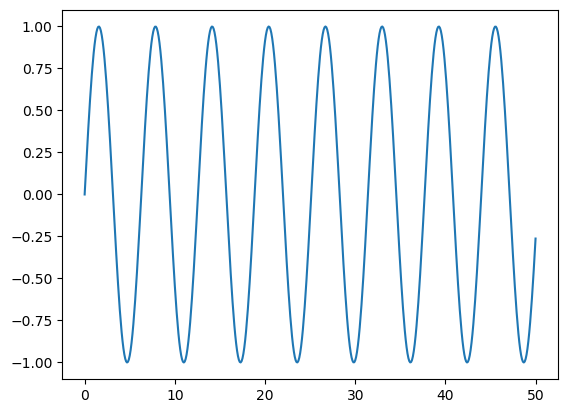

In [7]:
plt.plot(x,y)

In [8]:
df = pd.DataFrame(data = y, index=x, columns=['Sine'])

In [9]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [10]:
test_percent = 0.1

In [11]:
len(df)*test_percent

50.1

In [12]:
test_point = np.round(len(df)*test_percent)

In [13]:
test_point

50.0

In [14]:
test_ind = int(len(df)-test_point)

In [15]:
test_ind

451

In [16]:
train = df.iloc[:test_ind]
# train データは test_ind の前まで(０～450)

In [17]:
test = df.iloc[test_ind:]
# test データは test_indから最後まで(451～501)

In [18]:
# https://helve-blog.com/posts/python/scikit-learn-feature-scaling/
# since y data is used multiple times in RNN, the data needs to be "SCALED" 
# つまり値が０～１の間に収まるように計算する、ということ。MinMaxScalerによりそれが可能になる。

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
scaler.fit(train)
# trainデータの min, maxを計算

MinMaxScaler(copy=True, feature_range=(0, 1))

In [22]:
scaled_train = scaler.transform(train)
# scalerに基づいて trainデータを変換

In [23]:
scaled_test = scaler.transform(test)

In [24]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [25]:
# パラメータの中で batch size が大事
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module tensorflow.python.keras.preprocessing.sequence:

class TimeseriesGenerator(keras_preprocessing.sequence.TimeseriesGenerator, tensorflow.python.keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  # Arguments
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`.
 | 

In [26]:
length = 4
#length: length of the output sequences in number of time steps
batch_size = 1
#batch_size: how many value will be returned each time
#この場合、4つのtraining dataを使って３つめの値を推測するモデル
#lengthのサイズはモデルによって異なる。
#モデルがデータのパターンを理解できるくらいのlengthサイズが理想的。

#最初のargumant: Xのデータはどこか(scaled_trainのindex)、
#次のargument: yのデータはどこか(scaled_trainのvalue)

generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length=length,
                               batch_size = batch_size)

In [27]:
len(scaled_train)

451

In [28]:
len(generator)

447

In [29]:
X,y = generator[0]

In [30]:
X

array([[[0.49999912],
        [0.54991622],
        [0.59933458],
        [0.64776041]]])

In [31]:
y
# 上の４つのｘ値を使って予測したのが下のｙ値
# length = **
# batch size = **
# を変えることによって予測の仕方を確認できる。

array([[0.69470985]])

In [32]:
# scaled_train

### Lesson 83 Creating the model

In [33]:
length = 50
batch_size = 1

generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length=length,
                               batch_size = batch_size)

In [34]:
from tensorflow.keras.models import Sequential

In [35]:
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [36]:
n_features = 1
# いくつの変数 x を使って y を予測するか

In [37]:
model = Sequential()

model.add(SimpleRNN(50,input_shape = (length, n_features)))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss='mse')

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit_generator(generator, epochs=5)

Epoch 1/5
401/401 [==============================] - 13s 33ms/step - loss: 8.9070e-04
Epoch 2/5
401/401 [==============================] - 13s 32ms/step - loss: 2.8908e-04
Epoch 3/5
401/401 [==============================] - 13s 33ms/step - loss: 3.4368e-05
Epoch 4/5
401/401 [==============================] - 14s 36ms/step - loss: 1.0568e-04
Epoch 5/5
401/401 [==============================] - 15s 37ms/step - loss: 1.2018e-05


In [40]:
losses = pd.DataFrame(model.history.history)

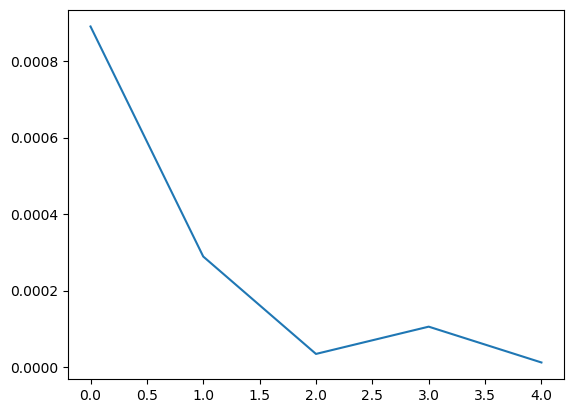

In [41]:
plt.plot(losses)

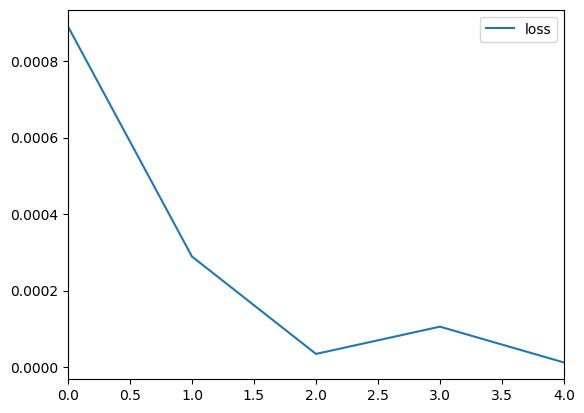

In [42]:
losses.plot()

In [43]:
# preparation before for loop
# steps for predicting values for test data
# 
# evaluating the model with the test data
first_eval_batch = scaled_train[-length:]

In [44]:
first_eval_batch

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [45]:
# we need to reshape the data for generalization
first_eval_batch = first_eval_batch.reshape((1,length,n_features))

In [46]:
model.predict(first_eval_batch)

array([[0.94492525]], dtype=float32)

In [47]:
scaled_test[0]

array([0.94955134])

👆 first_eval_batchで予測した値 0.9748とscaled_test[0] (0.9495)はかなり近い値。

以下ではこのモデルをfor loopに使って残りを予測

In [48]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)

# reshape fuction 
# （ここら辺の説明が難しい）
# Current_batchのarray 50個を使って1つ予測する。
# for loop で１つずつずらしながら予測していく。
# それをやるためにnp.appendを使う
# 

In [49]:
current_batch

array([[[8.37405820e-01],
        [7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.5

In [50]:
current_batch[:,1:,:]
#これで元々のcurrent_batchから最初の値が抜けて49個のarrayになった。

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

In [53]:
# 説明用の例
predicted_value = [[[99]]]
np.append(current_batch[:,1:,:],[[[99]]],axis= 1)
# current_batchの最初の値を取って、[[[99]]]を最後に加えた新しい50個のarrayが出来る(下記)。
# 実際には[[[99]]]の代わりにpredictされた値を最後に付け加えるコードになる。

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

In [80]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)

In [81]:
test_predictions

[array([0.9325512], dtype=float32),
 array([0.94750494], dtype=float32),
 array([0.9568446], dtype=float32),
 array([0.9605735], dtype=float32),
 array([0.95880497], dtype=float32),
 array([0.951706], dtype=float32),
 array([0.9394877], dtype=float32),
 array([0.92240006], dtype=float32),
 array([0.9007251], dtype=float32),
 array([0.87477195], dtype=float32),
 array([0.8448724], dtype=float32),
 array([0.81137747], dtype=float32),
 array([0.774655], dtype=float32),
 array([0.7350881], dtype=float32),
 array([0.693074], dtype=float32),
 array([0.64902407], dtype=float32),
 array([0.6033633], dtype=float32),
 array([0.55653083], dtype=float32),
 array([0.5089802], dtype=float32),
 array([0.46117893], dtype=float32),
 array([0.41360825], dtype=float32),
 array([0.366762], dtype=float32),
 array([0.3211442], dtype=float32),
 array([0.2772645], dtype=float32),
 array([0.2356313], dtype=float32),
 array([0.19674197], dtype=float32),
 array([0.16107045], dtype=float32),
 array([0.12905277], 

In [82]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [83]:
#modelで使ったデータはnormalizeされているので、元々のデータフォーマットに修正する
true_predictions = scaler.inverse_transform(test_predictions)

In [84]:
# true_predictionをtestデータセットに追加する
test['Predictions'] = true_predictions

C:\Users\te521690\.conda\envs\mytfenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


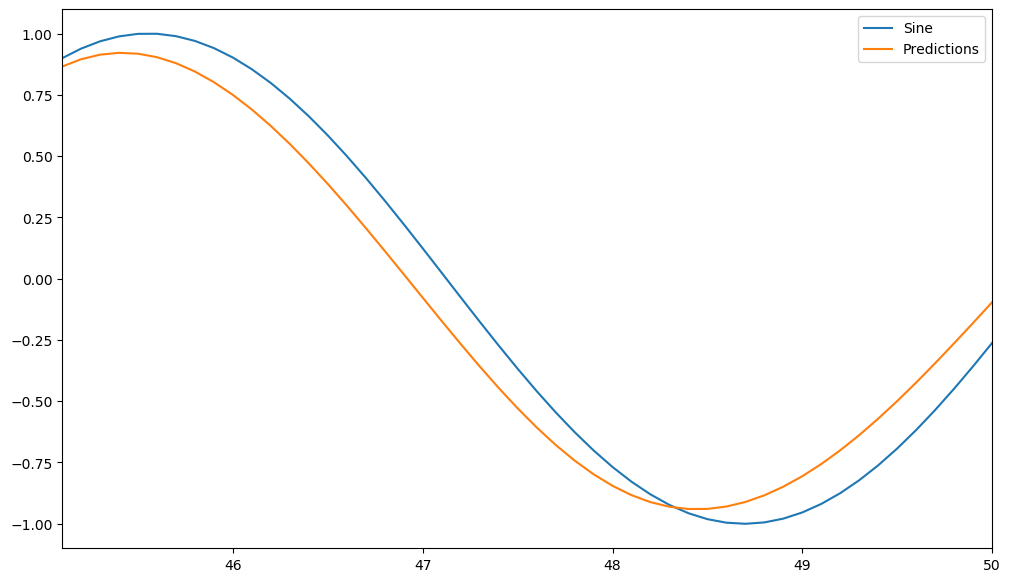

In [85]:
#👆このwarningは無視してよい。このwarningの意味は「test datasetが変わっちゃうよ」。
test.plot(figsize = (12,7))

👆 概ね良く予測できている。しかしバッチが進むほど予測が外れてきていることが分かる。これは最初のバッチは５０の実際のデータだが、

予測が進むにつれて 実際：予測の比率が、

50:0

49:1

48:2

47:3

のように変わっていくから。

### Lesson 84: Prediction with LSTM model

In [86]:
from tensorflow.keras.callbacks import EarlyStopping

In [87]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [88]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test,
                                           length= length, batch_size =1)
# エラーが出るコード。scaled_test と lengthがともに50。scaled-test = lengthは NG

In [90]:
length = 49

generator = TimeseriesGenerator(scaled_train, scaled_train,
                               length=length, batch_size =1)

validation_generator = TimeseriesGenerator(scaled_test, scaled_test,
                                          length=length, batch_size=1)

In [91]:
model = Sequential()

model.add(LSTM(50,input_shape = (length, n_features)))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss='mse')

In [92]:
model.fit_generator(generator, epochs=20,
                   validation_data= validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
402/402 [==============================] - 24s 60ms/step - loss: 0.0189 - val_loss: 7.3040e-05
Epoch 2/20
402/402 [==============================] - 24s 61ms/step - loss: 1.6300e-04 - val_loss: 3.6018e-04
Epoch 3/20
402/402 [==============================] - 24s 60ms/step - loss: 7.6195e-04 - val_loss: 2.6187e-05
Epoch 4/20
402/402 [==============================] - 24s 60ms/step - loss: 6.6632e-05 - val_loss: 8.2733e-05
Epoch 5/20
402/402 [==============================] - 24s 59ms/step - loss: 1.0026e-04 - val_loss: 2.2774e-06
Epoch 6/20
402/402 [==============================] - 24s 60ms/step - loss: 9.1386e-05 - val_loss: 2.1647e-05
Epoch 7/20
402/402 [==============================] - 24s 61ms/step - loss: 1.5771e-04 - val_loss: 1.4487e-05


In [93]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)

C:\Users\te521690\.conda\envs\mytfenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


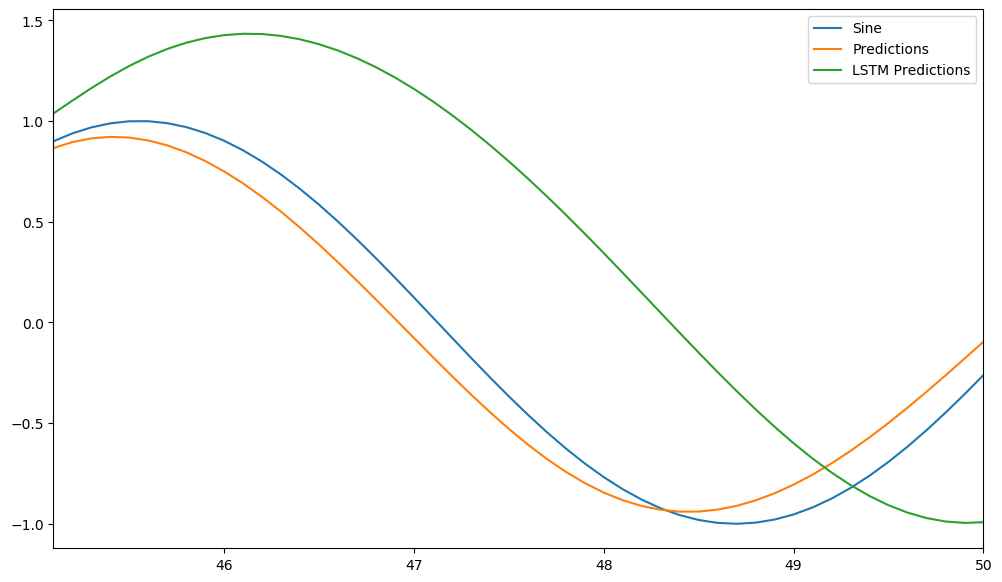

In [94]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize = (12,7))

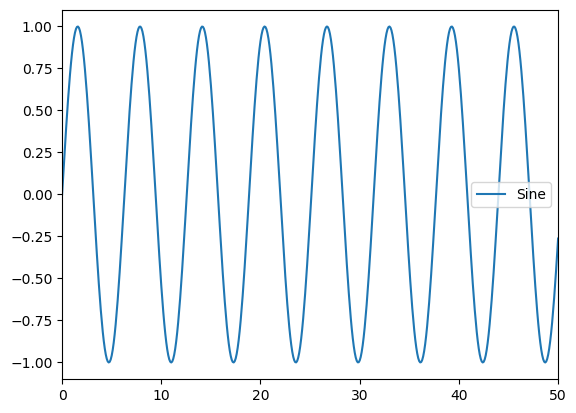

In [95]:
df.plot()

In [96]:
#ここら辺のロジックを理解する必要がある。

full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [97]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data,
                               length=length, batch_size =1)

In [98]:
model = Sequential()

model.add(LSTM(50,input_shape = (length, n_features)))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss='mse')

In [99]:
model.fit_generator(generator, epochs = 6)

Epoch 1/6
452/452 [==============================] - 26s 59ms/step - loss: 0.0103
Epoch 2/6
452/452 [==============================] - 27s 59ms/step - loss: 1.6404e-04
Epoch 3/6
452/452 [==============================] - 28s 62ms/step - loss: 3.2304e-04
Epoch 4/6
452/452 [==============================] - 27s 59ms/step - loss: 2.9252e-04
Epoch 5/6
452/452 [==============================] - 27s 60ms/step - loss: 5.8532e-05
Epoch 6/6
452/452 [==============================] - 31s 69ms/step - loss: 9.2031e-05


In [100]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)

for i in range(25):
    
    current_pred = model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)

In [102]:
forecast = scaler.inverse_transform(forecast)

df はデータが５０個あって、forecast(データ数は25個）をそこに追加する必要がある

（＝forecastのインデックスはdfの最後の50.0の後から0.1刻みで追加しなくてはならない）

In [104]:
# np.arange(始まり、終わり、刻みの単位)
forecast_index = np.arange(50.1,52.6,step=0.1)

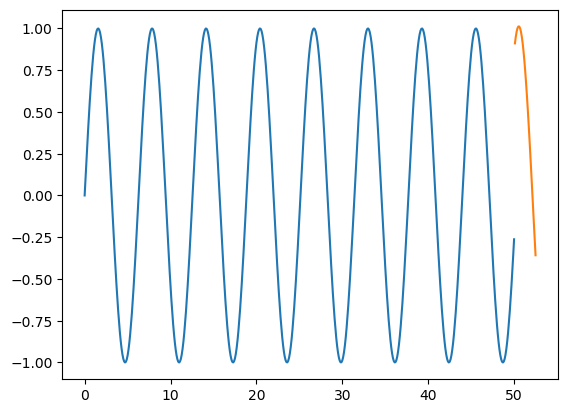

In [106]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index, forecast)